Импорт библиотек

In [41]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import random
import pickle
from sklearn.model_selection import train_test_split
from keras.preprocessing import image_dataset_from_directory
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.optimizers import Adam
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications.resnet50 import preprocess_input
from keras.models import Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Загрузка датасета

In [28]:
dataset_path = '../dataset/flowers'
flowers_path = '../dataset/flowers'

names = os.listdir(flowers_path)
total = 0
for name in names:
    print(name,end=', ')
    count = len(os.listdir(flowers_path+f"/{name}"))
    total += count
    print(f'amount: {count}')
print("Total =", total)

daisy, amount: 764
dandelion, amount: 1052
rose, amount: 784
sunflower, amount: 733
tulip, amount: 984
Total = 4317


In [37]:
DATASET_PATH = '../dataset/flowers'
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

# Load train dataset
train_dataset, test_dataset = image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="both",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

class_names = train_dataset.class_names
print("Classes:", class_names)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Using 863 files for validation.
Classes: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


Используем ResNet для извлечения признаков, обучаем

In [42]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
output = Dense(len(class_names), activation='softmax')(x)
model = Model(base_model.input, output)

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_dataset, epochs=5)  

Epoch 1/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.5733 - loss: 1.1733
Epoch 2/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.8564 - loss: 0.3941
Epoch 3/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.8959 - loss: 0.2900
Epoch 4/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.9214 - loss: 0.2315
Epoch 5/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.9433 - loss: 0.1906


In [43]:
feature_extractor = Model(inputs=model.input, outputs=model.layers[-2].output)

Получаем векторные признаки для изображений тестовой выборки

In [44]:
features_list = []

for images, _ in test_dataset:
    img_batch = preprocess_input(images.numpy())
    features = feature_extractor.predict(img_batch)
    features_list.extend(features)

features_array = np.array(features_list)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [46]:
image_paths = test_dataset.file_paths

Сохраняем векторные признаки

In [47]:
np.save('../embeddings/embeddings.npy', features_array)
with open('../image_paths/image_paths.pkl', 'wb') as f:
    pickle.dump(image_paths, f)

Находим топ 5 похожих изображений для заданного

In [53]:
def find_similar_images(input_img_path, feature_extractor, features_array, image_paths, top_n=5):
    """
    Given an input image path, returns top-N most similar images (excluding the input itself).
    
    Parameters:
        input_img_path (str): Path to the input image.
        feature_extractor (Keras Model): Model used to extract embeddings.
        features_array (np.array): Array of precomputed embeddings for the library images.
        image_paths (list): List of paths corresponding to the embeddings.
        top_n (int): Number of similar images to return.
        
    Returns:
        dict: Dictionary with image paths as keys and similarity scores as values.
    """
    img = image.load_img(input_img_path, target_size=IMAGE_SIZE)
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    input_feature = feature_extractor.predict(img_data)
    similarities = cosine_similarity(input_feature, features_array).flatten()

    matches = [(path, float(score)) for path, score in zip(image_paths, similarities)]
    matches.sort(key=lambda x: x[1], reverse=True)

    input_abs = os.path.abspath(input_img_path)
    filtered_matches = [m for m in matches if os.path.abspath(m[0]) != input_abs]

    top_matches = filtered_matches[:top_n]
    result_dict = {path: score for path, score in top_matches}
    return result_dict

Отображаем полученные результаты топ 5 похожих изображений для 5 случайных


Searching for: ../dataset/flowers\sunflower\26254755_1bfc494ef1_n.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


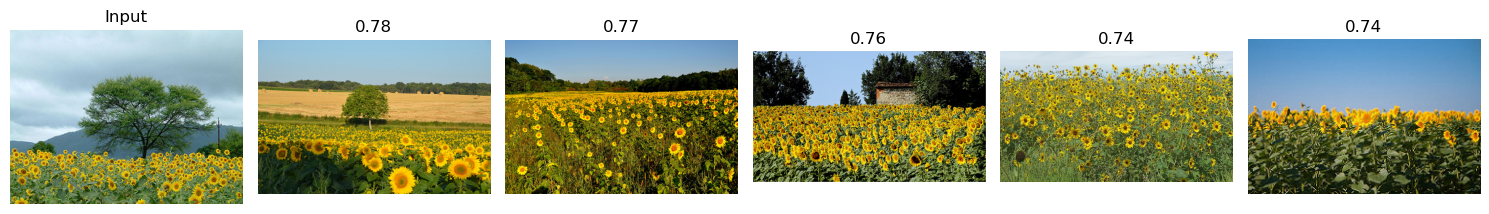


Searching for: ../dataset/flowers\rose\18990187093_09f2bff8fc_m.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


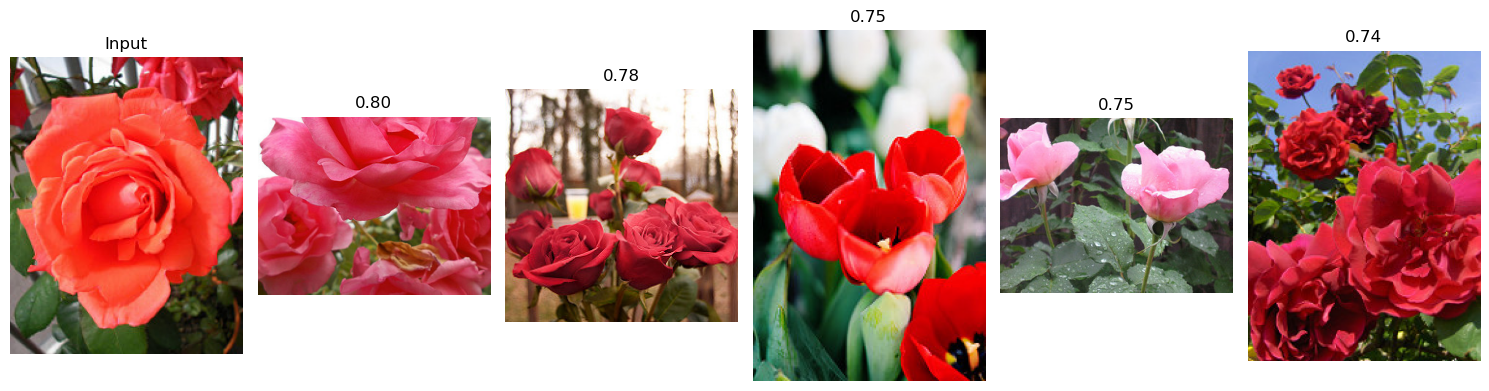


Searching for: ../dataset/flowers\tulip\4562423077_00b16240dc_n.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


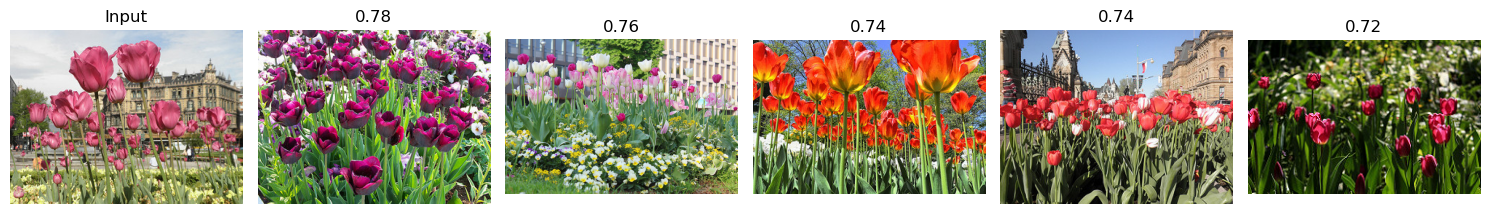


Searching for: ../dataset/flowers\sunflower\8174941335_56389b53e9_n.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


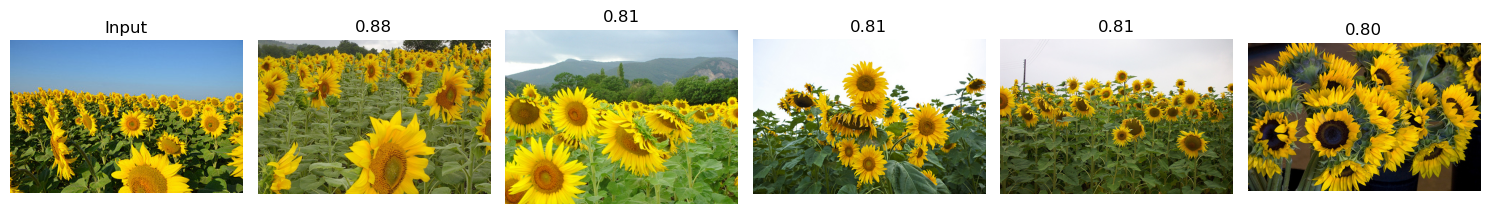


Searching for: ../dataset/flowers\daisy\16737503507_431768a927.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


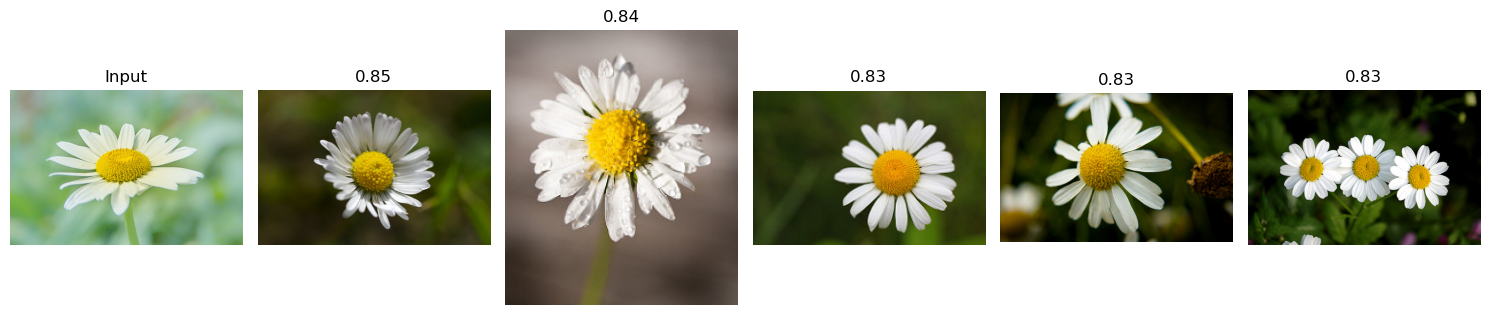

In [56]:
def plot_matches(input_path, match_paths, match_scores):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 6, 1)
    plt.imshow(image.load_img(input_path))
    plt.title("Input")
    plt.axis('off')

    for i, path in enumerate(match_paths):
        plt.subplot(1, 6, i + 2)
        plt.imshow(image.load_img(path))
        plt.title(f"{match_scores[i]:.2f}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

random.seed(42)
test_samples = random.sample(image_paths, 5)

for sample in test_samples:
    print(f"\nSearching for: {sample}")
    result = find_similar_images(sample, feature_extractor, features_array, image_paths)
    match_paths = list(result.keys())
    match_scores = list(result.values())
    plot_matches(sample, match_paths, match_scores)